In [1]:
import os
import sys
import math
import scipy as scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',30)
label_font_dict = {'family':'sans-serif','size':13.5, 'color':'brown','style':'italic'}
title_font_dict = {'family':'sans-serif', 'size':16.5, 'color':'Blue','style':'italic'}

# Beneficiary Data - Exploratory Data Analysis

In [3]:
train_bene_df = pd.read_csv(r"C:\Users\aakkewar\Documents\BOOTCAMP (PowerBI, SQL, Python, R)\DataScienceProject\Healthcare Provider Fraud Detection Analysis\Dataset\Train_Beneficiarydata-1542865627584.csv")

In [4]:
train_ip_df = pd.read_csv(r"C:\Users\aakkewar\Documents\BOOTCAMP (PowerBI, SQL, Python, R)\DataScienceProject\Healthcare Provider Fraud Detection Analysis\Dataset\Train_Inpatientdata-1542865627584.csv")

In [5]:
train_op_df = pd.read_csv(r"C:\Users\aakkewar\Documents\BOOTCAMP (PowerBI, SQL, Python, R)\DataScienceProject\Healthcare Provider Fraud Detection Analysis\Dataset\Train_Outpatientdata-1542865627584.csv")

In [6]:
train_bene_df.shape

(138556, 25)

In [7]:
train_bene_df.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [8]:
train_bene_df.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [9]:
train_bene_df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [10]:
#To get count of unique beneficiaries in the dataset
train_bene_df['BeneID'].nunique()

138556

In [11]:
#To Find how many number of records we have at the GENDER level
train_bene_df['Gender'].unique()

array([1, 2], dtype=int64)

In [12]:
train_bene_df['Gender'] = train_bene_df['Gender'].apply(lambda val: 0 if val == 2 else 1)

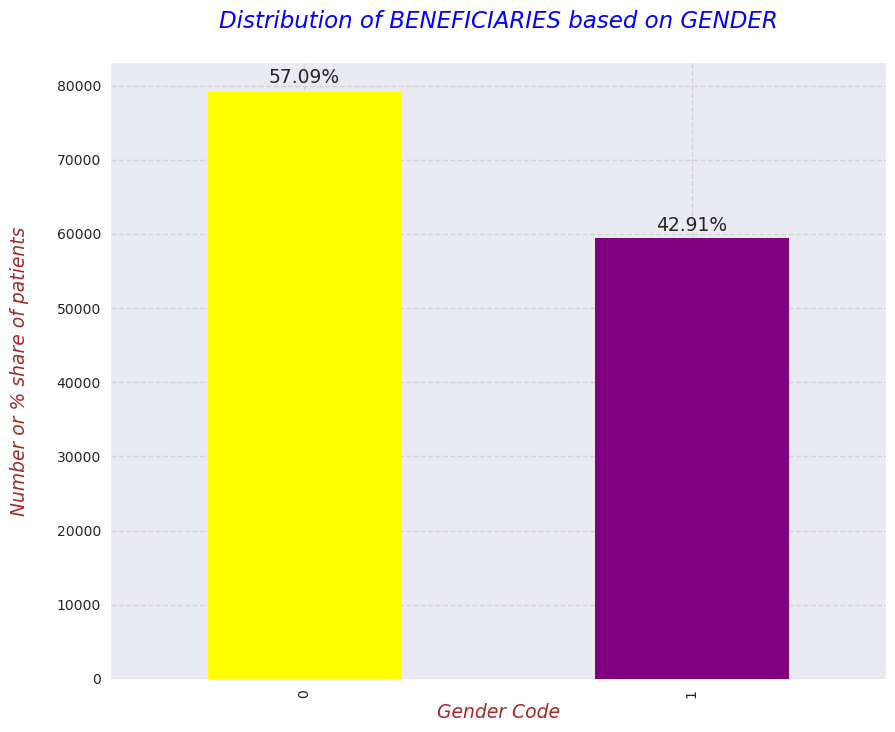

In [13]:
# Here, I'm displaying the distribution of BENEFICIARIES on the basis of GENDER 
with plt.style.context('seaborn'):
  plt.figure(figsize=(10,8))
  fig = train_bene_df['Gender'].value_counts().plot(kind='bar', color=['yellow','purple'])
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/train_bene_df.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
  # Providing the labels and title to the graph
  plt.xlabel("Gender Code", fontdict=label_font_dict)
  plt.ylabel("Number or % share of patients\n", fontdict=label_font_dict)
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES based on GENDER\n", fontdict=title_font_dict)

In [14]:
# Calculate the AGE of every BENEFICIARY
train_bene_df['DOB'] = pd.to_datetime(train_bene_df['DOB'], format="%Y-%m-%d")

In [15]:
train_bene_df['Patient_Age_Year'] = train_bene_df['DOB'].dt.year
train_bene_df['Patient_Age_Month'] = train_bene_df['DOB'].dt.month

In [16]:
bene_age_year_df = pd.DataFrame(train_bene_df['Patient_Age_Year'].value_counts()).reset_index(drop=False)
bene_age_year_df.columns= ['year','num_of_beneficiaries']
bene_age_year_df = bene_age_year_df.sort_values(by='year')

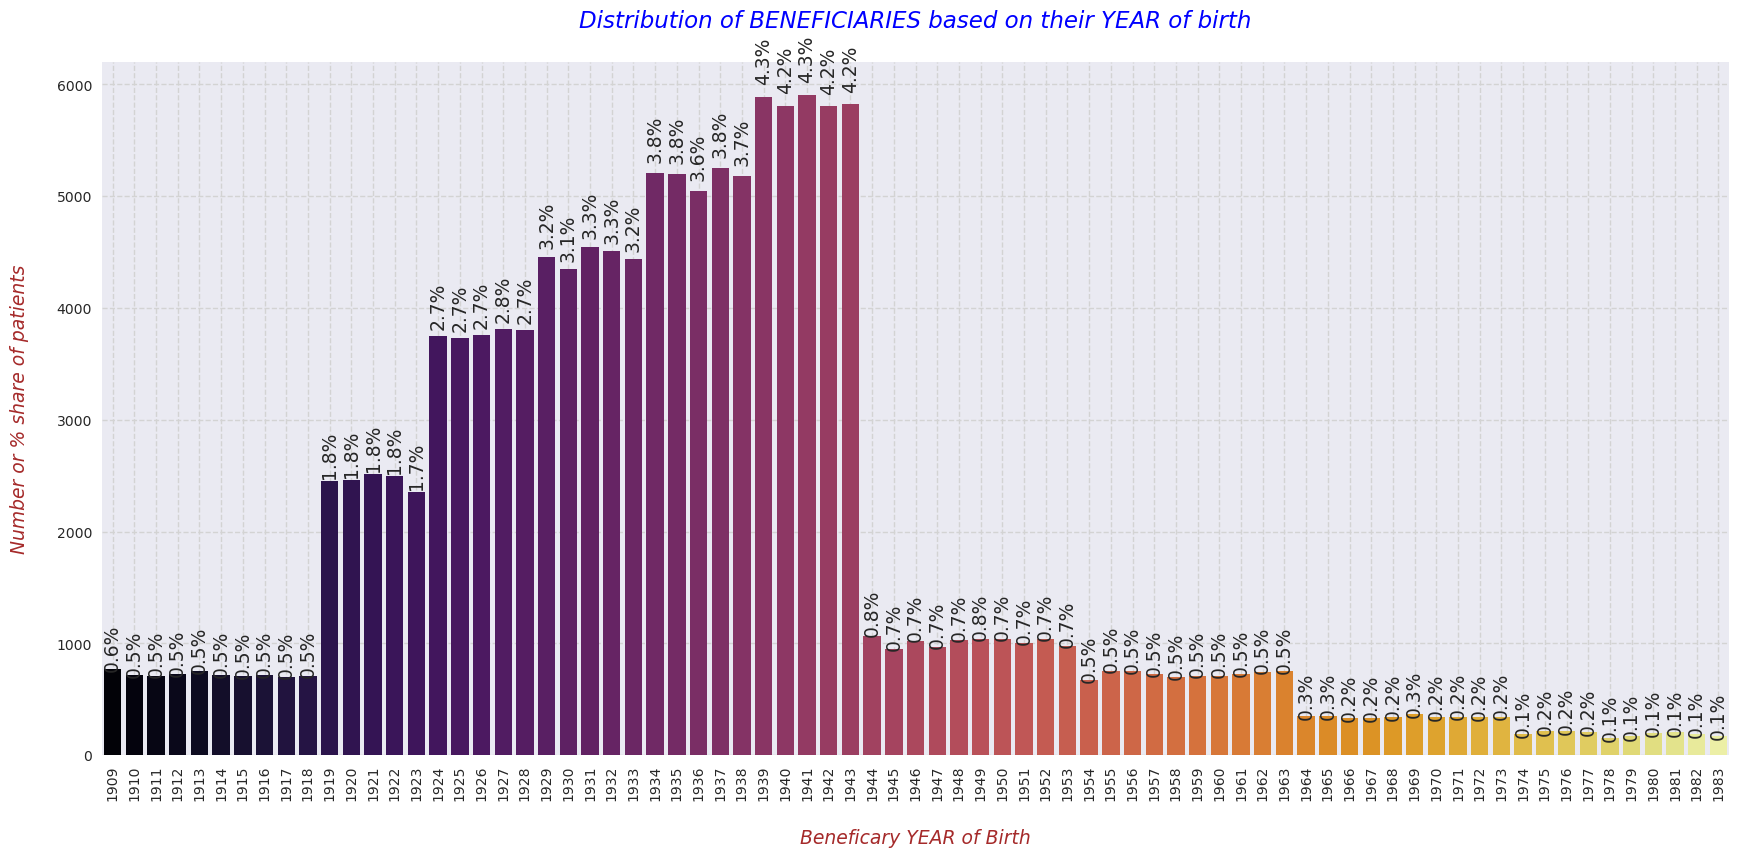

In [17]:
# displaying the distribution of BENEFICIARIES on the basis of their YEAR of Birth 
with plt.style.context('seaborn'):
  plt.figure(figsize=(21,9))
  fig = sns.barplot(data=bene_age_year_df, x='year', y='num_of_beneficiaries', palette='inferno')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/train_bene_df.shape[0],1))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
  # Providing the labels and title to the graph
  plt.xlabel("\nBeneficary YEAR of Birth", fontdict=label_font_dict)
  plt.xticks(rotation=90)
  plt.ylabel("Number or % share of patients\n", fontdict=label_font_dict)
  plt.minorticks_on()
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.title("Distribution of BENEFICIARIES based on their YEAR of birth\n", fontdict=title_font_dict)